In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 2.01 ms (started: 2021-01-22 11:55:16 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 28.7 s (started: 2021-01-22 11:55:16 +00:00)


In [ ]:
!pwd
import os
os.chdir('/content/drive/My Drive/ML/ml-project-master/src/')
!pwd

/content
/content/drive/My Drive/ML/ml-project-master/src
time: 420 ms (started: 2021-01-22 11:55:45 +00:00)


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid, relu, tanh
from tensorflow.keras import layers
from tensorflow.keras import initializers
import tensorflow.keras.utils
import sys

time: 2.71 s (started: 2021-01-22 11:55:45 +00:00)


In [ ]:
from utility import *

time: 314 ms (started: 2021-01-22 11:55:48 +00:00)


## import dataset

In [ ]:
Xtrain, Xtest, ytrain, ytest = load_monk("3")

time: 6.42 s (started: 2021-01-22 11:56:09 +00:00)


In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(122, 17)
(432, 17)
(122, 1)
(432, 1)
time: 3.88 ms (started: 2021-01-22 12:01:28 +00:00)


## Define Models

### Model 1

first model:  
    17->3->1  
    SGD  
    lr = 0.01  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1000

model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh,
#                kernel_initializer=initializers.GlorotUniform(),
#                bias_initializer=initializers.Zeros(),
               # kernel_regularizer=L2
               ))
model.add(tf.keras.layers.Dense(1, activation=tanh,
#                 kernel_initializer=initializers.GlorotUniform(),
#                 bias_initializer=initializers.Zeros(),
                # kernel_regularizer=L2
               ))

time: 74.3 ms (started: 2021-01-18 11:19:55 +00:00)


In [ ]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 24.4 ms (started: 2021-01-18 11:19:56 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
#                     validation_steps=5,
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 0.8610 - accuracy: 0.5082 - val_loss: 0.9140 - val_accuracy: 0.4722
Epoch 2/1000
1/1 - 0s - loss: 0.8363 - accuracy: 0.5082 - val_loss: 0.8869 - val_accuracy: 0.4722
Epoch 3/1000
1/1 - 0s - loss: 0.8126 - accuracy: 0.5082 - val_loss: 0.8609 - val_accuracy: 0.4722
Epoch 4/1000
1/1 - 0s - loss: 0.7899 - accuracy: 0.5082 - val_loss: 0.8360 - val_accuracy: 0.4722
Epoch 5/1000
1/1 - 0s - loss: 0.7683 - accuracy: 0.5082 - val_loss: 0.8121 - val_accuracy: 0.4722
Epoch 6/1000
1/1 - 0s - loss: 0.7477 - accuracy: 0.5164 - val_loss: 0.7893 - val_accuracy: 0.4653
Epoch 7/1000
1/1 - 0s - loss: 0.7281 - accuracy: 0.5164 - val_loss: 0.7675 - val_accuracy: 0.4676
Epoch 8/1000
1/1 - 0s - loss: 0.7094 - accuracy: 0.5246 - val_loss: 0.7468 - val_accuracy: 0.4653
Epoch 9/1000
1/1 - 0s - loss: 0.6916 - accuracy: 0.5246 - val_loss: 0.7269 - val_accuracy: 0.4653
Epoch 10/1000
1/1 - 0s - loss: 0.6747 - accuracy: 0.5328 - val_loss: 0.7080 - val_accuracy: 0.4653
Epoch 11/1000
1/1 -

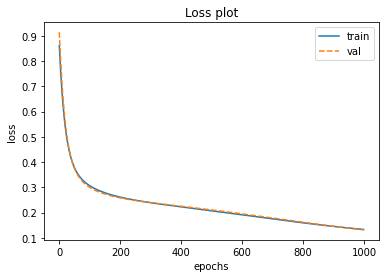

time: 163 ms (started: 2021-01-18 11:20:41 +00:00)


In [ ]:
plot_loss(history)

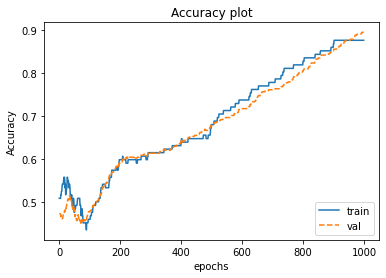

time: 180 ms (started: 2021-01-18 11:20:41 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.1333900|	0.88|
Test	|0.1316258|	0.90|
time: 2.7 ms (started: 2021-01-18 11:20:41 +00:00)


from the plot of the loss it seem that this model is slowing down too much slow so try to increase the learning rate and see if it go better and don't overfit.

# Model 2

first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1000


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 39.5 ms (started: 2021-01-18 11:20:41 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 0.2998 - accuracy: 0.5738 - val_loss: 0.2785 - val_accuracy: 0.6250
Epoch 2/1000
1/1 - 0s - loss: 0.2796 - accuracy: 0.5902 - val_loss: 0.2675 - val_accuracy: 0.6296
Epoch 3/1000
1/1 - 0s - loss: 0.2686 - accuracy: 0.6148 - val_loss: 0.2598 - val_accuracy: 0.6389
Epoch 4/1000
1/1 - 0s - loss: 0.2609 - accuracy: 0.6148 - val_loss: 0.2537 - val_accuracy: 0.6389
Epoch 5/1000
1/1 - 0s - loss: 0.2545 - accuracy: 0.6230 - val_loss: 0.2483 - val_accuracy: 0.6435
Epoch 6/1000
1/1 - 0s - loss: 0.2487 - accuracy: 0.6311 - val_loss: 0.2432 - val_accuracy: 0.6528
Epoch 7/1000
1/1 - 0s - loss: 0.2432 - accuracy: 0.6393 - val_loss: 0.2384 - val_accuracy: 0.6667
Epoch 8/1000
1/1 - 0s - loss: 0.2379 - accuracy: 0.6557 - val_loss: 0.2338 - val_accuracy: 0.6713
Epoch 9/1000
1/1 - 0s - loss: 0.2327 - accuracy: 0.6557 - val_loss: 0.2292 - val_accuracy: 0.6782
Epoch 10/1000
1/1 - 0s - loss: 0.2277 - accuracy: 0.6639 - val_loss: 0.2248 - val_accuracy: 0.6875
Epoch 11/1000
1/1 -

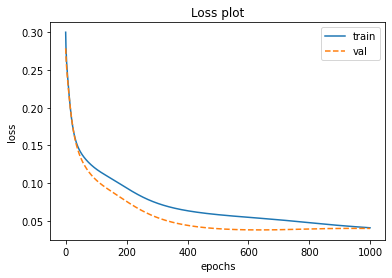

time: 196 ms (started: 2021-01-18 11:21:25 +00:00)


In [ ]:
plot_loss(history)

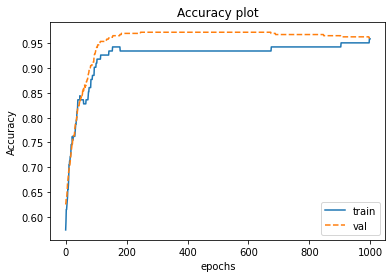

time: 210 ms (started: 2021-01-18 11:21:25 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0411403|	0.96|
Test	|0.0402799|	0.96|
time: 2.81 ms (started: 2021-01-18 11:21:25 +00:00)


Now it is performing much better

## Model 2.1 add sigmoid


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE
    activation = sigmoid
  
    

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=sigmoid))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 40.4 ms (started: 2021-01-18 11:21:25 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.3237 - accuracy: 0.5082 - val_loss: 0.3028 - val_accuracy: 0.4606
Epoch 2/1200
1/1 - 0s - loss: 0.2894 - accuracy: 0.5000 - val_loss: 0.2852 - val_accuracy: 0.4630
Epoch 3/1200
1/1 - 0s - loss: 0.2752 - accuracy: 0.5000 - val_loss: 0.2763 - val_accuracy: 0.4653
Epoch 4/1200
1/1 - 0s - loss: 0.2684 - accuracy: 0.5082 - val_loss: 0.2711 - val_accuracy: 0.4722
Epoch 5/1200
1/1 - 0s - loss: 0.2647 - accuracy: 0.4836 - val_loss: 0.2678 - val_accuracy: 0.4676
Epoch 6/1200
1/1 - 0s - loss: 0.2624 - accuracy: 0.4754 - val_loss: 0.2655 - val_accuracy: 0.4722
Epoch 7/1200
1/1 - 0s - loss: 0.2607 - accuracy: 0.4672 - val_loss: 0.2637 - val_accuracy: 0.4815
Epoch 8/1200
1/1 - 0s - loss: 0.2595 - accuracy: 0.4918 - val_loss: 0.2623 - val_accuracy: 0.4931
Epoch 9/1200
1/1 - 0s - loss: 0.2584 - accuracy: 0.5164 - val_loss: 0.2611 - val_accuracy: 0.4931
Epoch 10/1200
1/1 - 0s - loss: 0.2575 - accuracy: 0.5164 - val_loss: 0.2600 - val_accuracy: 0.5000
Epoch 11/1200
1/1 -

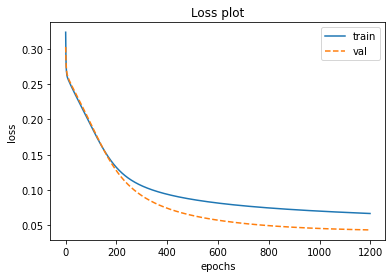

time: 204 ms (started: 2021-01-18 11:22:18 +00:00)


In [ ]:
plot_loss(history)

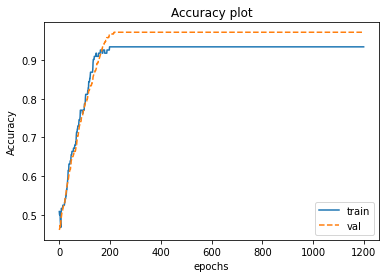

time: 181 ms (started: 2021-01-18 11:22:19 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0665302|	0.93|
Test	|0.0432309|	0.97|
time: 4.62 ms (started: 2021-01-18 11:22:19 +00:00)


The sigmoid function don't work really well, so don't use it, for the next experiment lets try to add the momentum for the SGD optimizer

## Model 2.2 add momentum = 0.9


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 35.5 ms (started: 2021-01-18 11:22:19 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.4558 - accuracy: 0.4918 - val_loss: 0.3738 - val_accuracy: 0.4907
Epoch 2/1200
1/1 - 0s - loss: 0.3625 - accuracy: 0.5000 - val_loss: 0.2849 - val_accuracy: 0.5185
Epoch 3/1200
1/1 - 0s - loss: 0.2889 - accuracy: 0.5082 - val_loss: 0.2642 - val_accuracy: 0.5208
Epoch 4/1200
1/1 - 0s - loss: 0.2786 - accuracy: 0.4836 - val_loss: 0.2753 - val_accuracy: 0.5185
Epoch 5/1200
1/1 - 0s - loss: 0.2949 - accuracy: 0.4836 - val_loss: 0.2868 - val_accuracy: 0.5278
Epoch 6/1200
1/1 - 0s - loss: 0.3084 - accuracy: 0.4918 - val_loss: 0.2888 - val_accuracy: 0.5278
Epoch 7/1200
1/1 - 0s - loss: 0.3107 - accuracy: 0.4918 - val_loss: 0.2804 - val_accuracy: 0.5278
Epoch 8/1200
1/1 - 0s - loss: 0.3009 - accuracy: 0.4918 - val_loss: 0.2634 - val_accuracy: 0.5278
Epoch 9/1200
1/1 - 0s - loss: 0.2808 - accuracy: 0.4918 - val_loss: 0.2432 - val_accuracy: 0.5556
Epoch 10/1200
1/1 - 0s - loss: 0.2553 - accuracy: 0.5246 - val_loss: 0.2315 - val_accuracy: 0.6528
Epoch 11/1200
1/1 -

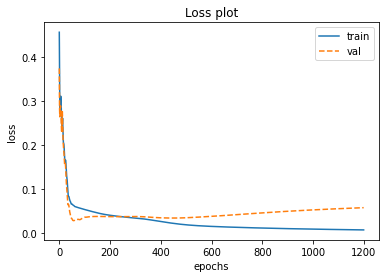

time: 195 ms (started: 2021-01-18 11:23:12 +00:00)


In [ ]:
plot_loss(history)

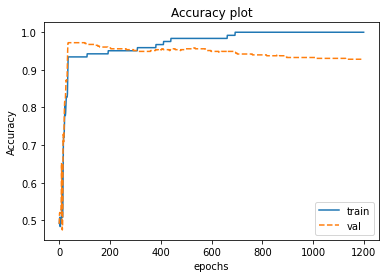

time: 188 ms (started: 2021-01-18 11:23:13 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0078224|	1.00|
Test	|0.0582175|	0.93|
time: 4.6 ms (started: 2021-01-18 11:23:13 +00:00)


As we can see with the addition of momentum the network achieve worst performance on the test but 100% on train so maybe we need to regularize

## Model 2.3 add Nesterov


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 35.1 ms (started: 2021-01-18 11:23:13 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.5281 - accuracy: 0.5000 - val_loss: 0.2656 - val_accuracy: 0.5556
Epoch 2/1200
1/1 - 0s - loss: 0.2584 - accuracy: 0.5984 - val_loss: 0.2467 - val_accuracy: 0.5995
Epoch 3/1200
1/1 - 0s - loss: 0.2544 - accuracy: 0.5492 - val_loss: 0.2582 - val_accuracy: 0.5602
Epoch 4/1200
1/1 - 0s - loss: 0.2714 - accuracy: 0.5000 - val_loss: 0.2609 - val_accuracy: 0.5394
Epoch 5/1200
1/1 - 0s - loss: 0.2756 - accuracy: 0.5000 - val_loss: 0.2504 - val_accuracy: 0.5602
Epoch 6/1200
1/1 - 0s - loss: 0.2642 - accuracy: 0.5082 - val_loss: 0.2287 - val_accuracy: 0.6134
Epoch 7/1200
1/1 - 0s - loss: 0.2397 - accuracy: 0.5820 - val_loss: 0.2035 - val_accuracy: 0.7431
Epoch 8/1200
1/1 - 0s - loss: 0.2098 - accuracy: 0.7459 - val_loss: 0.1874 - val_accuracy: 0.7940
Epoch 9/1200
1/1 - 0s - loss: 0.1884 - accuracy: 0.7787 - val_loss: 0.1850 - val_accuracy: 0.7639
Epoch 10/1200
1/1 - 0s - loss: 0.1818 - accuracy: 0.7377 - val_loss: 0.1851 - val_accuracy: 0.7731
Epoch 11/1200
1/1 -

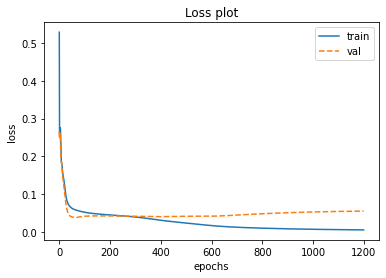

time: 199 ms (started: 2021-01-18 11:24:06 +00:00)


In [ ]:
plot_loss(history)

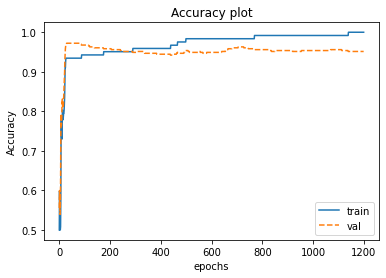

time: 293 ms (started: 2021-01-18 11:24:06 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0057808|	1.00|
Test	|0.0555181|	0.95|
time: 3.48 ms (started: 2021-01-18 11:24:07 +00:00)


Using Nesterov we get better performance, wo maybe we have to use it for the regularization

## Model 2.2.1 add Batch = 32


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS= 1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 33.6 ms (started: 2021-01-18 12:14:50 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
4/4 - 0s - loss: 0.3339 - accuracy: 0.5082 - val_loss: 0.3172 - val_accuracy: 0.5278
Epoch 2/1200
4/4 - 0s - loss: 0.3530 - accuracy: 0.4918 - val_loss: 0.3173 - val_accuracy: 0.5278
Epoch 3/1200
4/4 - 0s - loss: 0.2968 - accuracy: 0.5082 - val_loss: 0.2366 - val_accuracy: 0.5579
Epoch 4/1200
4/4 - 0s - loss: 0.2537 - accuracy: 0.5492 - val_loss: 0.2489 - val_accuracy: 0.4838
Epoch 5/1200
4/4 - 0s - loss: 0.2287 - accuracy: 0.5820 - val_loss: 0.2115 - val_accuracy: 0.6343
Epoch 6/1200
4/4 - 0s - loss: 0.2124 - accuracy: 0.6393 - val_loss: 0.1687 - val_accuracy: 0.7546
Epoch 7/1200
4/4 - 0s - loss: 0.1792 - accuracy: 0.7377 - val_loss: 0.1671 - val_accuracy: 0.7870
Epoch 8/1200
4/4 - 0s - loss: 0.1676 - accuracy: 0.8279 - val_loss: 0.1307 - val_accuracy: 0.8565
Epoch 9/1200
4/4 - 0s - loss: 0.1474 - accuracy: 0.8115 - val_loss: 0.1149 - val_accuracy: 0.8657
Epoch 10/1200
4/4 - 0s - loss: 0.1306 - accuracy: 0.8689 - val_loss: 0.1038 - val_accuracy: 0.9167
Epoch 11/1200
4/4 -

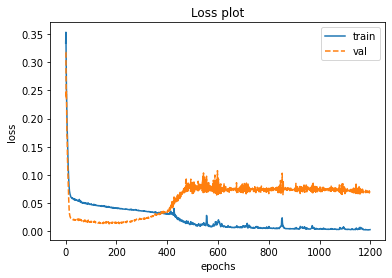

time: 203 ms (started: 2021-01-18 12:15:55 +00:00)


In [ ]:
plot_loss(history)

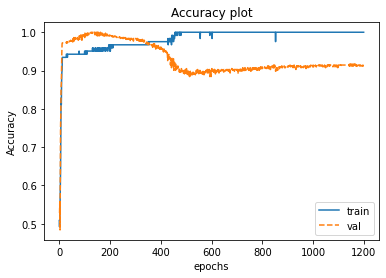

time: 204 ms (started: 2021-01-18 12:15:55 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0030606|	1.00|
Test	|0.0697599|	0.91|
time: 4.02 ms (started: 2021-01-18 12:15:56 +00:00)


With a batch_size=32 to the model 2.2 it decreases the accuracy

## Model 2.3.1 add Batch = 32 & Nesterov

first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS=600


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 38.2 ms (started: 2021-01-18 12:16:18 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
4/4 - 0s - loss: 0.6933 - accuracy: 0.4508 - val_loss: 0.3754 - val_accuracy: 0.5370
Epoch 2/600
4/4 - 0s - loss: 0.4100 - accuracy: 0.4918 - val_loss: 0.2843 - val_accuracy: 0.5764
Epoch 3/600
4/4 - 0s - loss: 0.2303 - accuracy: 0.6393 - val_loss: 0.1744 - val_accuracy: 0.7778
Epoch 4/600
4/4 - 0s - loss: 0.1666 - accuracy: 0.7951 - val_loss: 0.1169 - val_accuracy: 0.8935
Epoch 5/600
4/4 - 0s - loss: 0.1353 - accuracy: 0.8770 - val_loss: 0.1034 - val_accuracy: 0.9144
Epoch 6/600
4/4 - 0s - loss: 0.1152 - accuracy: 0.8934 - val_loss: 0.0856 - val_accuracy: 0.9560
Epoch 7/600
4/4 - 0s - loss: 0.0984 - accuracy: 0.9262 - val_loss: 0.0688 - val_accuracy: 0.9722
Epoch 8/600
4/4 - 0s - loss: 0.0874 - accuracy: 0.9344 - val_loss: 0.0559 - val_accuracy: 0.9722
Epoch 9/600
4/4 - 0s - loss: 0.0772 - accuracy: 0.9344 - val_loss: 0.0483 - val_accuracy: 0.9722
Epoch 10/600
4/4 - 0s - loss: 0.0710 - accuracy: 0.9344 - val_loss: 0.0456 - val_accuracy: 0.9722
Epoch 11/600
4/4 - 0s - loss:

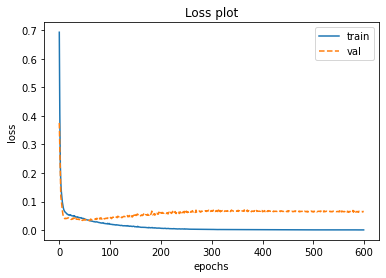

time: 200 ms (started: 2021-01-18 12:16:51 +00:00)


In [ ]:
plot_loss(history)

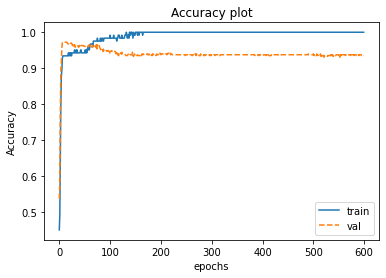

time: 202 ms (started: 2021-01-18 12:16:51 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0005408|	1.00|
Test	|0.0645364|	0.94|
time: 4.62 ms (started: 2021-01-18 12:16:52 +00:00)


With a batch_size=32 to the model 2.3 it decreases the accuracy

## Model 2.2.2 add l2 = 0.01


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.01  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 41.4 ms (started: 2021-01-18 11:24:38 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 1.3900 - accuracy: 0.5082 - val_loss: 0.8398 - val_accuracy: 0.4931
Epoch 2/1200
1/1 - 0s - loss: 0.8235 - accuracy: 0.5328 - val_loss: 0.3187 - val_accuracy: 0.5880
Epoch 3/1200
1/1 - 0s - loss: 0.3212 - accuracy: 0.5738 - val_loss: 0.3761 - val_accuracy: 0.5556
Epoch 4/1200
1/1 - 0s - loss: 0.3961 - accuracy: 0.5246 - val_loss: 0.4536 - val_accuracy: 0.5278
Epoch 5/1200
1/1 - 0s - loss: 0.4812 - accuracy: 0.4918 - val_loss: 0.4878 - val_accuracy: 0.5278
Epoch 6/1200
1/1 - 0s - loss: 0.5185 - accuracy: 0.4918 - val_loss: 0.5031 - val_accuracy: 0.5278
Epoch 7/1200
1/1 - 0s - loss: 0.5350 - accuracy: 0.4918 - val_loss: 0.5103 - val_accuracy: 0.5278
Epoch 8/1200
1/1 - 0s - loss: 0.5427 - accuracy: 0.4918 - val_loss: 0.5132 - val_accuracy: 0.5278
Epoch 9/1200
1/1 - 0s - loss: 0.5456 - accuracy: 0.4918 - val_loss: 0.5130 - val_accuracy: 0.5278
Epoch 10/1200
1/1 - 0s - loss: 0.5451 - accuracy: 0.4918 - val_loss: 0.5098 - val_accuracy: 0.5278
Epoch 11/1200
1/1 -

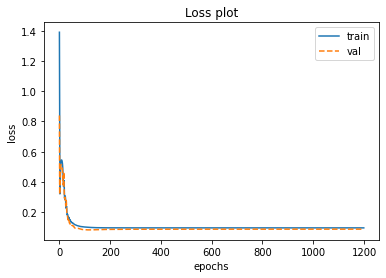

time: 190 ms (started: 2021-01-18 11:25:32 +00:00)


In [ ]:
plot_loss(history)

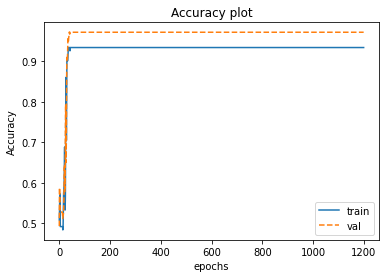

time: 190 ms (started: 2021-01-18 11:25:32 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0965812|	0.93|
Test	|0.0881176|	0.97|
time: 4.64 ms (started: 2021-01-18 11:25:32 +00:00)


Maybe we have regularized too much

## Model 2.3.1 add l2 = 0.01


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize= 0.01  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 41.1 ms (started: 2021-01-18 12:20:26 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 0.5718 - accuracy: 0.5082 - val_loss: 0.3812 - val_accuracy: 0.3843
Epoch 2/1200
1/1 - 0s - loss: 0.3665 - accuracy: 0.4016 - val_loss: 0.3150 - val_accuracy: 0.4884
Epoch 3/1200
1/1 - 0s - loss: 0.3141 - accuracy: 0.5164 - val_loss: 0.3005 - val_accuracy: 0.5324
Epoch 4/1200
1/1 - 0s - loss: 0.3065 - accuracy: 0.5246 - val_loss: 0.2915 - val_accuracy: 0.5648
Epoch 5/1200
1/1 - 0s - loss: 0.2997 - accuracy: 0.5492 - val_loss: 0.2767 - val_accuracy: 0.6250
Epoch 6/1200
1/1 - 0s - loss: 0.2840 - accuracy: 0.6148 - val_loss: 0.2573 - val_accuracy: 0.6806
Epoch 7/1200
1/1 - 0s - loss: 0.2610 - accuracy: 0.6885 - val_loss: 0.2415 - val_accuracy: 0.7153
Epoch 8/1200
1/1 - 0s - loss: 0.2397 - accuracy: 0.7377 - val_loss: 0.2372 - val_accuracy: 0.7199
Epoch 9/1200
1/1 - 0s - loss: 0.2301 - accuracy: 0.7131 - val_loss: 0.2390 - val_accuracy: 0.7315
Epoch 10/1200
1/1 - 0s - loss: 0.2290 - accuracy: 0.7377 - val_loss: 0.2338 - val_accuracy: 0.7477
Epoch 11/1200
1/1 -

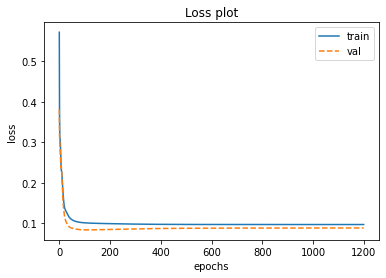

time: 200 ms (started: 2021-01-18 12:21:22 +00:00)


In [ ]:
plot_loss(history)

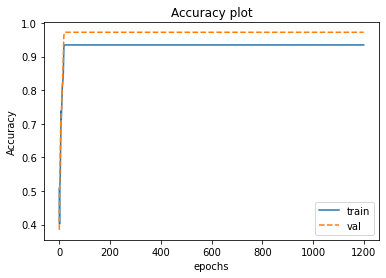

time: 195 ms (started: 2021-01-18 12:21:22 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0965817|	0.93|
Test	|0.0880832|	0.97|
time: 4.99 ms (started: 2021-01-18 12:21:22 +00:00)


Maybe we have regularized too much

## Model 2.3.1 add l2 = 0.001


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize= 0.001  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.001)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 37.3 ms (started: 2021-01-18 12:22:09 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.6832 - accuracy: 0.4918 - val_loss: 0.3123 - val_accuracy: 0.6042
Epoch 2/1200
1/1 - 0s - loss: 0.3565 - accuracy: 0.5410 - val_loss: 0.3008 - val_accuracy: 0.6111
Epoch 3/1200
1/1 - 0s - loss: 0.3400 - accuracy: 0.5738 - val_loss: 0.3127 - val_accuracy: 0.5949
Epoch 4/1200
1/1 - 0s - loss: 0.3508 - accuracy: 0.5656 - val_loss: 0.3014 - val_accuracy: 0.5949
Epoch 5/1200
1/1 - 0s - loss: 0.3389 - accuracy: 0.5656 - val_loss: 0.2635 - val_accuracy: 0.6458
Epoch 6/1200
1/1 - 0s - loss: 0.3005 - accuracy: 0.6066 - val_loss: 0.2112 - val_accuracy: 0.7199
Epoch 7/1200
1/1 - 0s - loss: 0.2461 - accuracy: 0.6885 - val_loss: 0.1829 - val_accuracy: 0.8009
Epoch 8/1200
1/1 - 0s - loss: 0.2125 - accuracy: 0.7541 - val_loss: 0.1800 - val_accuracy: 0.8056
Epoch 9/1200
1/1 - 0s - loss: 0.2052 - accuracy: 0.7623 - val_loss: 0.1709 - val_accuracy: 0.8125
Epoch 10/1200
1/1 - 0s - loss: 0.1947 - accuracy: 0.7623 - val_loss: 0.1532 - val_accuracy: 0.8218
Epoch 11/1200
1/1 -

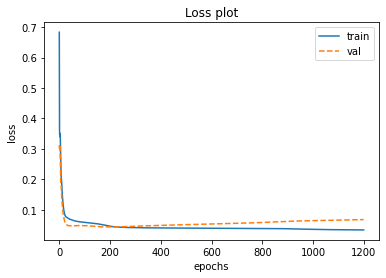

time: 208 ms (started: 2021-01-18 12:23:05 +00:00)


In [ ]:
plot_loss(history)

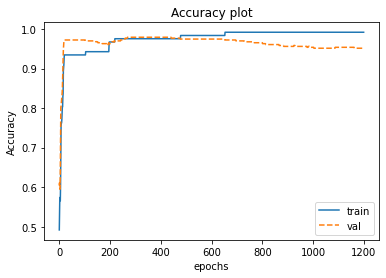

time: 207 ms (started: 2021-01-18 12:23:05 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0334871|	0.99|
Test	|0.0673885|	0.95|
time: 3.74 ms (started: 2021-01-18 12:23:05 +00:00)


We try to increase the reg term of a little bit

## Model 2.3.1 add l2 = 0.003


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize= 0.003  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.003)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 36.1 ms (started: 2021-01-18 12:28:45 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.2871 - accuracy: 0.5738 - val_loss: 0.2722 - val_accuracy: 0.6296
Epoch 2/1200
1/1 - 0s - loss: 0.2322 - accuracy: 0.6311 - val_loss: 0.2412 - val_accuracy: 0.6528
Epoch 3/1200
1/1 - 0s - loss: 0.2157 - accuracy: 0.6803 - val_loss: 0.2287 - val_accuracy: 0.6644
Epoch 4/1200
1/1 - 0s - loss: 0.2121 - accuracy: 0.7131 - val_loss: 0.2194 - val_accuracy: 0.6852
Epoch 5/1200
1/1 - 0s - loss: 0.2069 - accuracy: 0.7213 - val_loss: 0.2089 - val_accuracy: 0.7037
Epoch 6/1200
1/1 - 0s - loss: 0.1968 - accuracy: 0.7295 - val_loss: 0.1984 - val_accuracy: 0.7245
Epoch 7/1200
1/1 - 0s - loss: 0.1848 - accuracy: 0.7541 - val_loss: 0.1903 - val_accuracy: 0.7477
Epoch 8/1200
1/1 - 0s - loss: 0.1749 - accuracy: 0.7787 - val_loss: 0.1849 - val_accuracy: 0.7685
Epoch 9/1200
1/1 - 0s - loss: 0.1686 - accuracy: 0.8115 - val_loss: 0.1800 - val_accuracy: 0.7778
Epoch 10/1200
1/1 - 0s - loss: 0.1646 - accuracy: 0.8115 - val_loss: 0.1735 - val_accuracy: 0.7917
Epoch 11/1200
1/1 -

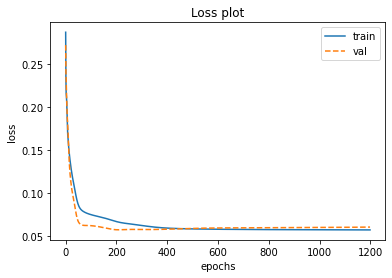

time: 205 ms (started: 2021-01-18 12:29:44 +00:00)


In [ ]:
plot_loss(history)

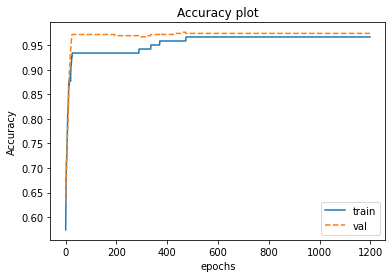

time: 211 ms (started: 2021-01-18 12:29:44 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0569075|	0.97|
Test	|0.0602134|	0.97|
time: 4.5 ms (started: 2021-01-18 12:29:44 +00:00)


The genaralization gap is small maybe the model is to easy so we add 1 node

# Model 3

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 33.8 ms (started: 2021-01-18 12:32:38 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 1.7581 - accuracy: 0.5000 - val_loss: 1.3915 - val_accuracy: 0.4491
Epoch 2/1200
1/1 - 0s - loss: 1.4101 - accuracy: 0.5000 - val_loss: 0.9266 - val_accuracy: 0.4190
Epoch 3/1200
1/1 - 0s - loss: 0.9662 - accuracy: 0.4590 - val_loss: 0.5606 - val_accuracy: 0.4051
Epoch 4/1200
1/1 - 0s - loss: 0.5717 - accuracy: 0.4016 - val_loss: 0.4049 - val_accuracy: 0.4560
Epoch 5/1200
1/1 - 0s - loss: 0.3982 - accuracy: 0.3852 - val_loss: 0.3578 - val_accuracy: 0.4815
Epoch 6/1200
1/1 - 0s - loss: 0.3485 - accuracy: 0.4262 - val_loss: 0.3373 - val_accuracy: 0.5116
Epoch 7/1200
1/1 - 0s - loss: 0.3274 - accuracy: 0.5000 - val_loss: 0.3246 - val_accuracy: 0.5231
Epoch 8/1200
1/1 - 0s - loss: 0.3141 - accuracy: 0.5246 - val_loss: 0.3148 - val_accuracy: 0.5394
Epoch 9/1200
1/1 - 0s - loss: 0.3036 - accuracy: 0.5410 - val_loss: 0.3063 - val_accuracy: 0.5417
Epoch 10/1200
1/1 - 0s - loss: 0.2942 - accuracy: 0.5410 - val_loss: 0.2985 - val_accuracy: 0.5509
Epoch 11/1200
1/1 -

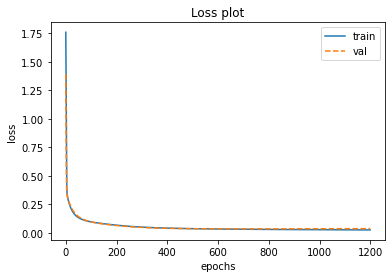

time: 207 ms (started: 2021-01-18 12:33:34 +00:00)


In [ ]:
plot_loss(history)

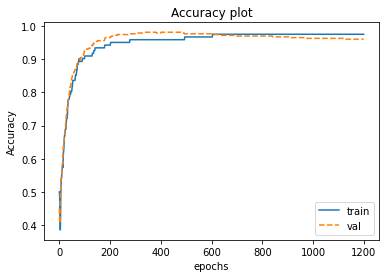

time: 201 ms (started: 2021-01-18 12:33:34 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0269557|	0.98|
Test	|0.0380525|	0.96|
time: 2.59 ms (started: 2021-01-18 12:33:35 +00:00)


## Model 3.1 add sigmoid


first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE
    activation = sigmoid
  
    

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=sigmoid))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 40.6 ms (started: 2021-01-18 12:33:36 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 1.7062 - accuracy: 0.5082 - val_loss: 1.4037 - val_accuracy: 0.4722
Epoch 2/1200
1/1 - 0s - loss: 1.3283 - accuracy: 0.5082 - val_loss: 0.8850 - val_accuracy: 0.4722
Epoch 3/1200
1/1 - 0s - loss: 0.8265 - accuracy: 0.5082 - val_loss: 0.4786 - val_accuracy: 0.4745
Epoch 4/1200
1/1 - 0s - loss: 0.4389 - accuracy: 0.5082 - val_loss: 0.3185 - val_accuracy: 0.5324
Epoch 5/1200
1/1 - 0s - loss: 0.2909 - accuracy: 0.5738 - val_loss: 0.2676 - val_accuracy: 0.5995
Epoch 6/1200
1/1 - 0s - loss: 0.2463 - accuracy: 0.6639 - val_loss: 0.2482 - val_accuracy: 0.6134
Epoch 7/1200
1/1 - 0s - loss: 0.2304 - accuracy: 0.6557 - val_loss: 0.2392 - val_accuracy: 0.6366
Epoch 8/1200
1/1 - 0s - loss: 0.2236 - accuracy: 0.6639 - val_loss: 0.2343 - val_accuracy: 0.6296
Epoch 9/1200
1/1 - 0s - loss: 0.2201 - accuracy: 0.6557 - val_loss: 0.2312 - val_accuracy: 0.6389
Epoch 10/1200
1/1 - 0s - loss: 0.2179 - accuracy: 0.6639 - val_loss: 0.2290 - val_accuracy: 0.6389
Epoch 11/1200
1/1 -

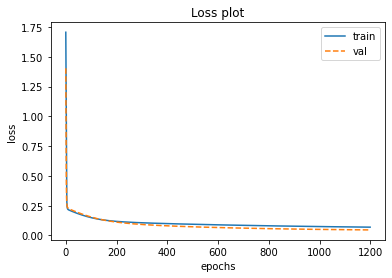

time: 204 ms (started: 2021-01-18 12:34:30 +00:00)


In [ ]:
plot_loss(history)

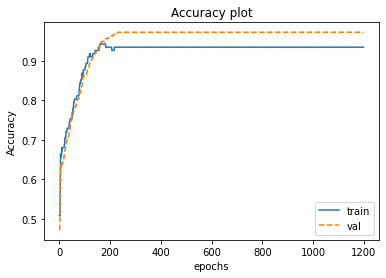

time: 190 ms (started: 2021-01-18 12:34:30 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0698555|	0.93|
Test	|0.0466948|	0.97|
time: 2.65 ms (started: 2021-01-18 12:34:31 +00:00)


The sigmoid function don't work really well, so don't use it, for the next experiment lets try to add the momentum for the SGD optimizer

## Model 3.2 add momentum = 0.9


first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 34.7 ms (started: 2021-01-18 12:34:32 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 1.3918 - accuracy: 0.4836 - val_loss: 1.0709 - val_accuracy: 0.4282
Epoch 2/1200
1/1 - 0s - loss: 0.9973 - accuracy: 0.4918 - val_loss: 0.5039 - val_accuracy: 0.3148
Epoch 3/1200
1/1 - 0s - loss: 0.4644 - accuracy: 0.3115 - val_loss: 0.3604 - val_accuracy: 0.4977
Epoch 4/1200
1/1 - 0s - loss: 0.3689 - accuracy: 0.5082 - val_loss: 0.3865 - val_accuracy: 0.5278
Epoch 5/1200
1/1 - 0s - loss: 0.4116 - accuracy: 0.4918 - val_loss: 0.4068 - val_accuracy: 0.5278
Epoch 6/1200
1/1 - 0s - loss: 0.4359 - accuracy: 0.4918 - val_loss: 0.4157 - val_accuracy: 0.5278
Epoch 7/1200
1/1 - 0s - loss: 0.4460 - accuracy: 0.4918 - val_loss: 0.4177 - val_accuracy: 0.5278
Epoch 8/1200
1/1 - 0s - loss: 0.4483 - accuracy: 0.4918 - val_loss: 0.4148 - val_accuracy: 0.5278
Epoch 9/1200
1/1 - 0s - loss: 0.4452 - accuracy: 0.4918 - val_loss: 0.4072 - val_accuracy: 0.5278
Epoch 10/1200
1/1 - 0s - loss: 0.4367 - accuracy: 0.4918 - val_loss: 0.3937 - val_accuracy: 0.5278
Epoch 11/1200
1/1 -

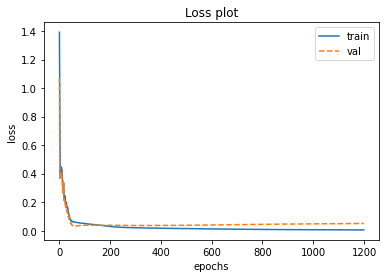

time: 199 ms (started: 2021-01-18 12:35:27 +00:00)


In [ ]:
plot_loss(history)

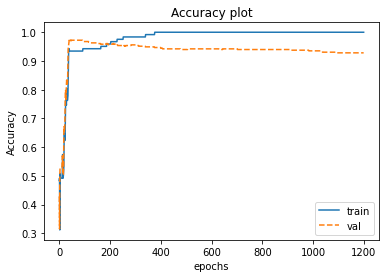

time: 221 ms (started: 2021-01-18 12:35:27 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0053676|	1.00|
Test	|0.0506066|	0.93|
time: 5.87 ms (started: 2021-01-18 12:35:27 +00:00)


As we can see with the addition of momentum the network achieve worst performance on the test but 100% on train so maybe we need to regularize

## Model 3.4 add Nesterov


first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 36.2 ms (started: 2021-01-18 12:35:27 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.8354 - accuracy: 0.4754 - val_loss: 0.4392 - val_accuracy: 0.5000
Epoch 2/1200
1/1 - 0s - loss: 0.4010 - accuracy: 0.5656 - val_loss: 0.2992 - val_accuracy: 0.5185
Epoch 3/1200
1/1 - 0s - loss: 0.2979 - accuracy: 0.4754 - val_loss: 0.2908 - val_accuracy: 0.5463
Epoch 4/1200
1/1 - 0s - loss: 0.3056 - accuracy: 0.5082 - val_loss: 0.2946 - val_accuracy: 0.5417
Epoch 5/1200
1/1 - 0s - loss: 0.3157 - accuracy: 0.5000 - val_loss: 0.2888 - val_accuracy: 0.5509
Epoch 6/1200
1/1 - 0s - loss: 0.3116 - accuracy: 0.5082 - val_loss: 0.2695 - val_accuracy: 0.5602
Epoch 7/1200
1/1 - 0s - loss: 0.2912 - accuracy: 0.5082 - val_loss: 0.2380 - val_accuracy: 0.6134
Epoch 8/1200
1/1 - 0s - loss: 0.2556 - accuracy: 0.5574 - val_loss: 0.2048 - val_accuracy: 0.6736
Epoch 9/1200
1/1 - 0s - loss: 0.2149 - accuracy: 0.6311 - val_loss: 0.1914 - val_accuracy: 0.7083
Epoch 10/1200
1/1 - 0s - loss: 0.1915 - accuracy: 0.7131 - val_loss: 0.2013 - val_accuracy: 0.6898
Epoch 11/1200
1/1 -

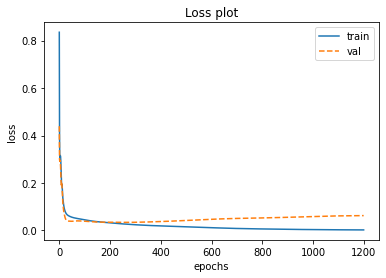

time: 197 ms (started: 2021-01-18 12:36:23 +00:00)


In [ ]:
plot_loss(history)

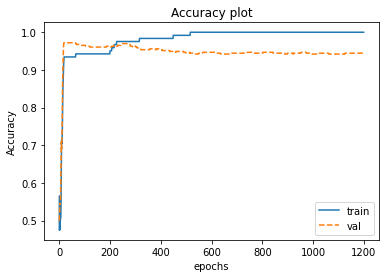

time: 192 ms (started: 2021-01-18 12:36:23 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0019720|	1.00|
Test	|0.0622770|	0.94|
time: 4.07 ms (started: 2021-01-18 12:36:23 +00:00)


Using Nesterov we get better performance, wo maybe we have to use it for the regularization

## Model 3.2.1 add Batch = 32


first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS= 1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 181 ms (started: 2021-01-18 12:36:23 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
4/4 - 0s - loss: 0.5448 - accuracy: 0.5656 - val_loss: 0.3107 - val_accuracy: 0.5301
Epoch 2/1200
4/4 - 0s - loss: 0.3345 - accuracy: 0.5000 - val_loss: 0.2434 - val_accuracy: 0.6273
Epoch 3/1200
4/4 - 0s - loss: 0.2706 - accuracy: 0.6230 - val_loss: 0.2609 - val_accuracy: 0.6667
Epoch 4/1200
4/4 - 0s - loss: 0.2339 - accuracy: 0.6639 - val_loss: 0.1794 - val_accuracy: 0.7176
Epoch 5/1200
4/4 - 0s - loss: 0.1626 - accuracy: 0.7869 - val_loss: 0.1561 - val_accuracy: 0.7940
Epoch 6/1200
4/4 - 0s - loss: 0.1703 - accuracy: 0.8197 - val_loss: 0.1064 - val_accuracy: 0.8773
Epoch 7/1200
4/4 - 0s - loss: 0.1241 - accuracy: 0.8607 - val_loss: 0.0670 - val_accuracy: 0.9653
Epoch 8/1200
4/4 - 0s - loss: 0.0895 - accuracy: 0.9344 - val_loss: 0.0674 - val_accuracy: 0.9722
Epoch 9/1200
4/4 - 0s - loss: 0.0836 - accuracy: 0.9344 - val_loss: 0.0523 - val_accuracy: 0.9560
Epoch 10/1200
4/4 - 0s - loss: 0.0779 - accuracy: 0.9344 - val_loss: 0.0530 - val_accuracy: 0.9722
Epoch 11/1200
4/4 -

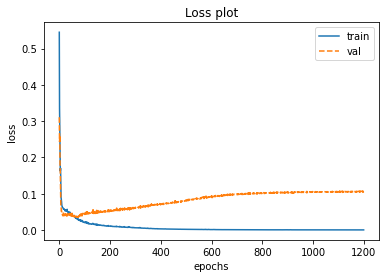

time: 195 ms (started: 2021-01-18 12:37:28 +00:00)


In [ ]:
plot_loss(history)

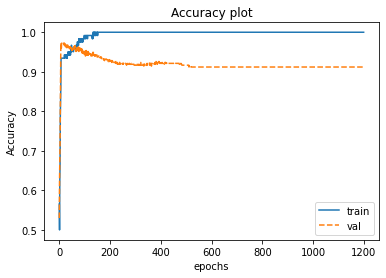

time: 199 ms (started: 2021-01-18 12:37:28 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0003671|	1.00|
Test	|0.1054657|	0.91|
time: 2.65 ms (started: 2021-01-18 12:37:28 +00:00)


With a batch_size=32 to the model 3.2 it decreases the accuracy

## Model 3.3.1 add Batch = 32 & Nesterov

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS=600


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 27.5 ms (started: 2021-01-18 12:37:30 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
4/4 - 0s - loss: 0.3593 - accuracy: 0.4754 - val_loss: 0.2400 - val_accuracy: 0.5995
Epoch 2/600
4/4 - 0s - loss: 0.2335 - accuracy: 0.5820 - val_loss: 0.2027 - val_accuracy: 0.6921
Epoch 3/600
4/4 - 0s - loss: 0.1964 - accuracy: 0.7377 - val_loss: 0.1910 - val_accuracy: 0.7292
Epoch 4/600
4/4 - 0s - loss: 0.1585 - accuracy: 0.8115 - val_loss: 0.1408 - val_accuracy: 0.8218
Epoch 5/600
4/4 - 0s - loss: 0.1282 - accuracy: 0.8525 - val_loss: 0.1152 - val_accuracy: 0.9259
Epoch 6/600
4/4 - 0s - loss: 0.1115 - accuracy: 0.9344 - val_loss: 0.0881 - val_accuracy: 0.9699
Epoch 7/600
4/4 - 0s - loss: 0.0971 - accuracy: 0.9344 - val_loss: 0.0749 - val_accuracy: 0.9699
Epoch 8/600
4/4 - 0s - loss: 0.0874 - accuracy: 0.9344 - val_loss: 0.0648 - val_accuracy: 0.9722
Epoch 9/600
4/4 - 0s - loss: 0.0804 - accuracy: 0.9344 - val_loss: 0.0563 - val_accuracy: 0.9722
Epoch 10/600
4/4 - 0s - loss: 0.0756 - accuracy: 0.9344 - val_loss: 0.0507 - val_accuracy: 0.9722
Epoch 11/600
4/4 - 0s - loss:

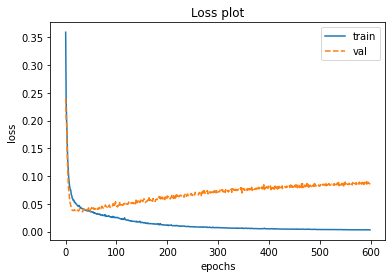

time: 205 ms (started: 2021-01-18 12:38:02 +00:00)


In [ ]:
plot_loss(history)

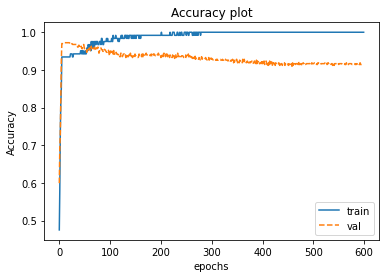

time: 146 ms (started: 2021-01-18 12:38:02 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0031245|	1.00|
Test	|0.0872488|	0.91|
time: 3.74 ms (started: 2021-01-18 12:38:02 +00:00)


With a batch_size=32 to the model 2.3 it decreases the accuracy

## Model 3.2.2 add l2 = 0.01


first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.01  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 44.1 ms (started: 2021-01-18 12:38:02 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.8589 - accuracy: 0.5082 - val_loss: 0.5299 - val_accuracy: 0.4722
Epoch 2/1200
1/1 - 0s - loss: 0.4777 - accuracy: 0.5082 - val_loss: 0.2966 - val_accuracy: 0.6042
Epoch 3/1200
1/1 - 0s - loss: 0.2919 - accuracy: 0.5820 - val_loss: 0.3320 - val_accuracy: 0.5463
Epoch 4/1200
1/1 - 0s - loss: 0.3518 - accuracy: 0.5082 - val_loss: 0.3859 - val_accuracy: 0.5278
Epoch 5/1200
1/1 - 0s - loss: 0.4134 - accuracy: 0.4918 - val_loss: 0.4147 - val_accuracy: 0.5278
Epoch 6/1200
1/1 - 0s - loss: 0.4450 - accuracy: 0.4918 - val_loss: 0.4247 - val_accuracy: 0.5278
Epoch 7/1200
1/1 - 0s - loss: 0.4560 - accuracy: 0.4918 - val_loss: 0.4206 - val_accuracy: 0.5278
Epoch 8/1200
1/1 - 0s - loss: 0.4522 - accuracy: 0.4918 - val_loss: 0.4020 - val_accuracy: 0.5278
Epoch 9/1200
1/1 - 0s - loss: 0.4336 - accuracy: 0.4918 - val_loss: 0.3648 - val_accuracy: 0.5370
Epoch 10/1200
1/1 - 0s - loss: 0.3965 - accuracy: 0.5082 - val_loss: 0.3045 - val_accuracy: 0.6042
Epoch 11/1200
1/1 -

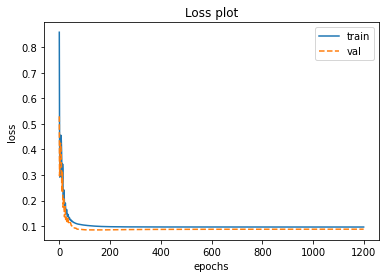

time: 204 ms (started: 2021-01-18 12:38:58 +00:00)


In [ ]:
plot_loss(history)

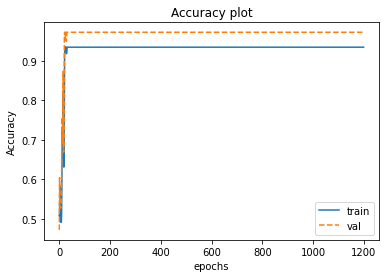

time: 193 ms (started: 2021-01-18 12:38:58 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0965813|	0.93|
Test	|0.0881025|	0.97|
time: 4.38 ms (started: 2021-01-18 12:38:58 +00:00)


Maybe we have regularized too much

## Model 3.3.1 add l2 = 0.01


first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize= 0.01  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 35.7 ms (started: 2021-01-18 12:38:58 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 1.7812 - accuracy: 0.4754 - val_loss: 1.0910 - val_accuracy: 0.3218
Epoch 2/1200
1/1 - 0s - loss: 1.0344 - accuracy: 0.3689 - val_loss: 0.5724 - val_accuracy: 0.4005
Epoch 3/1200
1/1 - 0s - loss: 0.6076 - accuracy: 0.3443 - val_loss: 0.5150 - val_accuracy: 0.5185
Epoch 4/1200
1/1 - 0s - loss: 0.5476 - accuracy: 0.4836 - val_loss: 0.5248 - val_accuracy: 0.5278
Epoch 5/1200
1/1 - 0s - loss: 0.5593 - accuracy: 0.4918 - val_loss: 0.5313 - val_accuracy: 0.5278
Epoch 6/1200
1/1 - 0s - loss: 0.5664 - accuracy: 0.4918 - val_loss: 0.5339 - val_accuracy: 0.5278
Epoch 7/1200
1/1 - 0s - loss: 0.5692 - accuracy: 0.4918 - val_loss: 0.5342 - val_accuracy: 0.5278
Epoch 8/1200
1/1 - 0s - loss: 0.5694 - accuracy: 0.4918 - val_loss: 0.5328 - val_accuracy: 0.5278
Epoch 9/1200
1/1 - 0s - loss: 0.5679 - accuracy: 0.4918 - val_loss: 0.5298 - val_accuracy: 0.5278
Epoch 10/1200
1/1 - 0s - loss: 0.5647 - accuracy: 0.4918 - val_loss: 0.5249 - val_accuracy: 0.5278
Epoch 11/1200
1/1 -

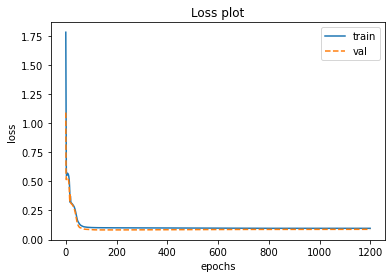

time: 218 ms (started: 2021-01-18 12:39:52 +00:00)


In [ ]:
plot_loss(history)

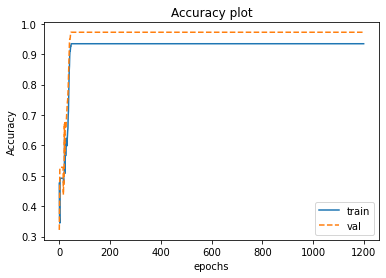

time: 211 ms (started: 2021-01-18 12:39:53 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0965870|	0.93|
Test	|0.0879816|	0.97|
time: 4.84 ms (started: 2021-01-18 12:39:53 +00:00)


Maybe we have regularized too much

## Model 3.3.1 add l2 = 0.001


first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize= 0.001  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.001)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 41.5 ms (started: 2021-01-18 12:39:53 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 0.3328 - accuracy: 0.5574 - val_loss: 0.2302 - val_accuracy: 0.6319
Epoch 2/1200
1/1 - 0s - loss: 0.2146 - accuracy: 0.6393 - val_loss: 0.1860 - val_accuracy: 0.7431
Epoch 3/1200
1/1 - 0s - loss: 0.1836 - accuracy: 0.7705 - val_loss: 0.1794 - val_accuracy: 0.7685
Epoch 4/1200
1/1 - 0s - loss: 0.1844 - accuracy: 0.7869 - val_loss: 0.1751 - val_accuracy: 0.7593
Epoch 5/1200
1/1 - 0s - loss: 0.1834 - accuracy: 0.7459 - val_loss: 0.1635 - val_accuracy: 0.7755
Epoch 6/1200
1/1 - 0s - loss: 0.1730 - accuracy: 0.7623 - val_loss: 0.1476 - val_accuracy: 0.8241
Epoch 7/1200
1/1 - 0s - loss: 0.1571 - accuracy: 0.8115 - val_loss: 0.1354 - val_accuracy: 0.8542
Epoch 8/1200
1/1 - 0s - loss: 0.1445 - accuracy: 0.8443 - val_loss: 0.1310 - val_accuracy: 0.8796
Epoch 9/1200
1/1 - 0s - loss: 0.1401 - accuracy: 0.8443 - val_loss: 0.1300 - val_accuracy: 0.8889
Epoch 10/1200
1/1 - 0s - loss: 0.1398 - accuracy: 0.8525 - val_loss: 0.1269 - val_accuracy: 0.8981
Epoch 11/1200
1/1 -

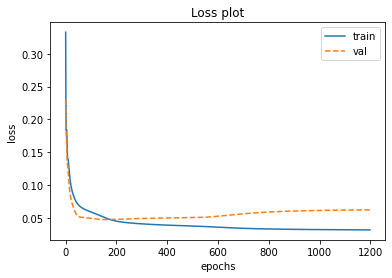

time: 206 ms (started: 2021-01-18 12:40:48 +00:00)


In [ ]:
plot_loss(history)

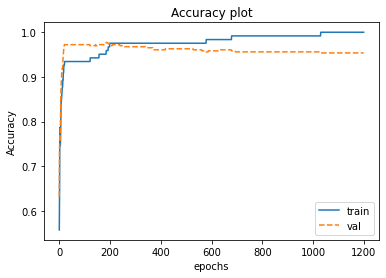

time: 194 ms (started: 2021-01-18 12:40:49 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0313574|	1.00|
Test	|0.0619531|	0.95|
time: 4.14 ms (started: 2021-01-18 12:40:49 +00:00)


We try to increase the reg term of a little bit

## Model 3.3.1 add l2 = 0.003


first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize= 0.003  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.003)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 37.6 ms (started: 2021-01-18 12:40:49 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 0.5595 - accuracy: 0.5082 - val_loss: 0.4189 - val_accuracy: 0.4630
Epoch 2/1200
1/1 - 0s - loss: 0.3999 - accuracy: 0.5000 - val_loss: 0.3124 - val_accuracy: 0.4722
Epoch 3/1200
1/1 - 0s - loss: 0.3014 - accuracy: 0.5328 - val_loss: 0.2684 - val_accuracy: 0.5648
Epoch 4/1200
1/1 - 0s - loss: 0.2670 - accuracy: 0.6311 - val_loss: 0.2537 - val_accuracy: 0.6250
Epoch 5/1200
1/1 - 0s - loss: 0.2603 - accuracy: 0.6066 - val_loss: 0.2479 - val_accuracy: 0.6389
Epoch 6/1200
1/1 - 0s - loss: 0.2602 - accuracy: 0.6148 - val_loss: 0.2440 - val_accuracy: 0.6273
Epoch 7/1200
1/1 - 0s - loss: 0.2599 - accuracy: 0.5984 - val_loss: 0.2408 - val_accuracy: 0.6319
Epoch 8/1200
1/1 - 0s - loss: 0.2589 - accuracy: 0.6230 - val_loss: 0.2383 - val_accuracy: 0.6389
Epoch 9/1200
1/1 - 0s - loss: 0.2577 - accuracy: 0.6230 - val_loss: 0.2354 - val_accuracy: 0.6389
Epoch 10/1200
1/1 - 0s - loss: 0.2556 - accuracy: 0.6148 - val_loss: 0.2304 - val_accuracy: 0.6481
Epoch 11/1200
1/1 -

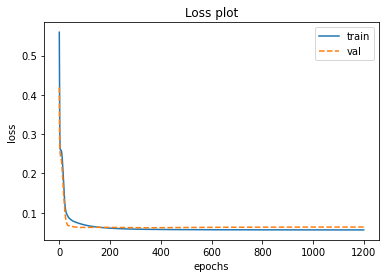

time: 182 ms (started: 2021-01-18 12:41:44 +00:00)


In [ ]:
plot_loss(history)

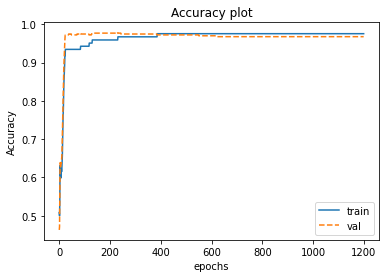

time: 222 ms (started: 2021-01-18 12:41:44 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0561396|	0.98|
Test	|0.0635236|	0.97|
time: 4.19 ms (started: 2021-01-18 12:41:45 +00:00)


The same conclusion as the model 2 so we increase the number of nodes

# Model 4

first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 34.7 ms (started: 2021-01-18 12:46:50 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.6850 - accuracy: 0.4590 - val_loss: 0.6867 - val_accuracy: 0.4120
Epoch 2/1200
1/1 - 0s - loss: 0.5548 - accuracy: 0.4426 - val_loss: 0.5810 - val_accuracy: 0.4259
Epoch 3/1200
1/1 - 0s - loss: 0.4768 - accuracy: 0.4426 - val_loss: 0.5144 - val_accuracy: 0.4444
Epoch 4/1200
1/1 - 0s - loss: 0.4305 - accuracy: 0.4672 - val_loss: 0.4721 - val_accuracy: 0.4560
Epoch 5/1200
1/1 - 0s - loss: 0.4025 - accuracy: 0.4754 - val_loss: 0.4442 - val_accuracy: 0.4630
Epoch 6/1200
1/1 - 0s - loss: 0.3843 - accuracy: 0.4590 - val_loss: 0.4245 - val_accuracy: 0.4745
Epoch 7/1200
1/1 - 0s - loss: 0.3712 - accuracy: 0.4754 - val_loss: 0.4098 - val_accuracy: 0.4792
Epoch 8/1200
1/1 - 0s - loss: 0.3607 - accuracy: 0.4836 - val_loss: 0.3980 - val_accuracy: 0.4838
Epoch 9/1200
1/1 - 0s - loss: 0.3514 - accuracy: 0.4754 - val_loss: 0.3881 - val_accuracy: 0.4907
Epoch 10/1200
1/1 - 0s - loss: 0.3429 - accuracy: 0.5000 - val_loss: 0.3794 - val_accuracy: 0.4954
Epoch 11/1200
1/1 -

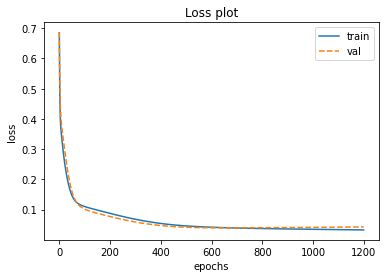

time: 200 ms (started: 2021-01-18 12:47:47 +00:00)


In [ ]:
plot_loss(history)

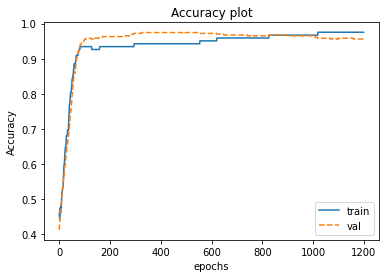

time: 195 ms (started: 2021-01-18 12:47:47 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0329448|	0.98|
Test	|0.0428874|	0.96|
time: 4.47 ms (started: 2021-01-18 12:47:47 +00:00)


## Model 4.1 add sigmoid


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE
    activation = sigmoid
  
    

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=sigmoid))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 34.3 ms (started: 2021-01-18 12:47:48 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.5685 - accuracy: 0.5082 - val_loss: 0.3877 - val_accuracy: 0.4722
Epoch 2/1200
1/1 - 0s - loss: 0.3451 - accuracy: 0.5082 - val_loss: 0.3106 - val_accuracy: 0.4722
Epoch 3/1200
1/1 - 0s - loss: 0.2804 - accuracy: 0.5328 - val_loss: 0.2828 - val_accuracy: 0.5046
Epoch 4/1200
1/1 - 0s - loss: 0.2592 - accuracy: 0.5410 - val_loss: 0.2702 - val_accuracy: 0.5023
Epoch 5/1200
1/1 - 0s - loss: 0.2505 - accuracy: 0.5246 - val_loss: 0.2635 - val_accuracy: 0.5093
Epoch 6/1200
1/1 - 0s - loss: 0.2462 - accuracy: 0.5328 - val_loss: 0.2593 - val_accuracy: 0.5394
Epoch 7/1200
1/1 - 0s - loss: 0.2437 - accuracy: 0.5574 - val_loss: 0.2564 - val_accuracy: 0.5417
Epoch 8/1200
1/1 - 0s - loss: 0.2419 - accuracy: 0.5738 - val_loss: 0.2543 - val_accuracy: 0.5463
Epoch 9/1200
1/1 - 0s - loss: 0.2406 - accuracy: 0.5902 - val_loss: 0.2525 - val_accuracy: 0.5440
Epoch 10/1200
1/1 - 0s - loss: 0.2394 - accuracy: 0.5902 - val_loss: 0.2510 - val_accuracy: 0.5463
Epoch 11/1200
1/1 -

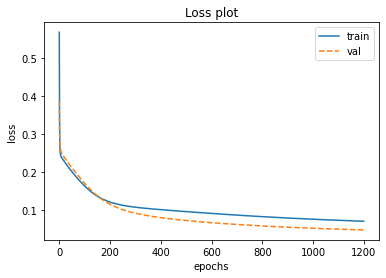

time: 192 ms (started: 2021-01-18 12:48:43 +00:00)


In [ ]:
plot_loss(history)

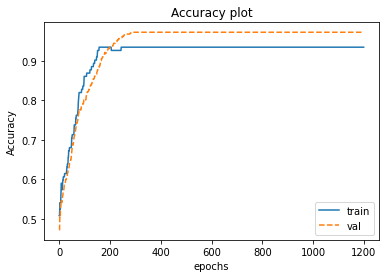

time: 175 ms (started: 2021-01-18 12:48:43 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0716386|	0.93|
Test	|0.0488974|	0.97|
time: 5.09 ms (started: 2021-01-18 12:48:44 +00:00)


The sigmoid function don't work really well, so don't use it, for the next experiment lets try to add the momentum for the SGD optimizer

## Model 4.2 add momentum = 0.9


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 34.6 ms (started: 2021-01-18 12:48:44 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.3089 - accuracy: 0.5492 - val_loss: 0.2851 - val_accuracy: 0.5833
Epoch 2/1200
1/1 - 0s - loss: 0.2918 - accuracy: 0.5656 - val_loss: 0.2579 - val_accuracy: 0.6088
Epoch 3/1200
1/1 - 0s - loss: 0.2708 - accuracy: 0.5902 - val_loss: 0.2339 - val_accuracy: 0.6481
Epoch 4/1200
1/1 - 0s - loss: 0.2520 - accuracy: 0.6148 - val_loss: 0.2107 - val_accuracy: 0.6759
Epoch 5/1200
1/1 - 0s - loss: 0.2313 - accuracy: 0.6393 - val_loss: 0.1845 - val_accuracy: 0.7199
Epoch 6/1200
1/1 - 0s - loss: 0.2041 - accuracy: 0.6803 - val_loss: 0.1595 - val_accuracy: 0.7801
Epoch 7/1200
1/1 - 0s - loss: 0.1748 - accuracy: 0.7623 - val_loss: 0.1470 - val_accuracy: 0.8356
Epoch 8/1200
1/1 - 0s - loss: 0.1564 - accuracy: 0.8361 - val_loss: 0.1480 - val_accuracy: 0.8403
Epoch 9/1200
1/1 - 0s - loss: 0.1533 - accuracy: 0.8852 - val_loss: 0.1448 - val_accuracy: 0.8519
Epoch 10/1200
1/1 - 0s - loss: 0.1503 - accuracy: 0.8852 - val_loss: 0.1289 - val_accuracy: 0.8935
Epoch 11/1200
1/1 -

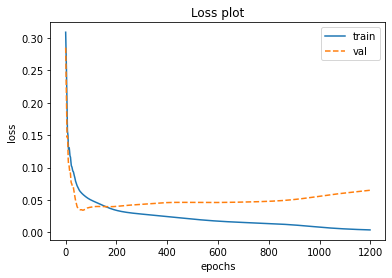

time: 188 ms (started: 2021-01-18 12:49:39 +00:00)


In [ ]:
plot_loss(history)

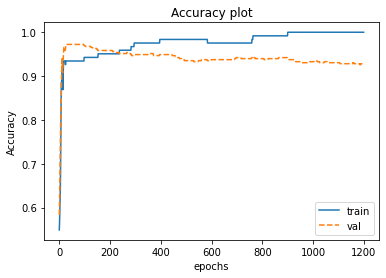

time: 191 ms (started: 2021-01-18 12:49:39 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0039429|	1.00|
Test	|0.0651363|	0.93|
time: 2.06 ms (started: 2021-01-18 12:49:39 +00:00)


As we can see with the addition of momentum the network achieve worst performance on the test but 100% on train so maybe we need to regularize

## Model 4.3 add Nesterov


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 44.8 ms (started: 2021-01-18 12:49:40 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.6528 - accuracy: 0.4754 - val_loss: 0.5030 - val_accuracy: 0.4375
Epoch 2/1200
1/1 - 0s - loss: 0.4941 - accuracy: 0.4262 - val_loss: 0.3901 - val_accuracy: 0.4815
Epoch 3/1200
1/1 - 0s - loss: 0.4127 - accuracy: 0.4672 - val_loss: 0.3462 - val_accuracy: 0.5116
Epoch 4/1200
1/1 - 0s - loss: 0.3768 - accuracy: 0.4672 - val_loss: 0.3238 - val_accuracy: 0.5278
Epoch 5/1200
1/1 - 0s - loss: 0.3538 - accuracy: 0.4754 - val_loss: 0.2978 - val_accuracy: 0.5440
Epoch 6/1200
1/1 - 0s - loss: 0.3245 - accuracy: 0.4836 - val_loss: 0.2603 - val_accuracy: 0.5903
Epoch 7/1200
1/1 - 0s - loss: 0.2801 - accuracy: 0.5574 - val_loss: 0.2193 - val_accuracy: 0.6690
Epoch 8/1200
1/1 - 0s - loss: 0.2259 - accuracy: 0.6639 - val_loss: 0.2024 - val_accuracy: 0.6852
Epoch 9/1200
1/1 - 0s - loss: 0.1899 - accuracy: 0.7541 - val_loss: 0.2114 - val_accuracy: 0.6875
Epoch 10/1200
1/1 - 0s - loss: 0.1843 - accuracy: 0.7213 - val_loss: 0.2031 - val_accuracy: 0.6968
Epoch 11/1200
1/1 -

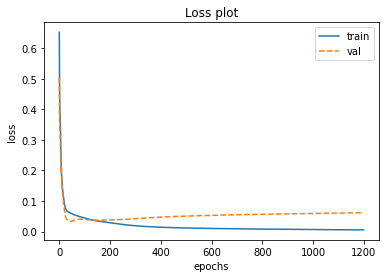

time: 204 ms (started: 2021-01-18 12:50:35 +00:00)


In [ ]:
plot_loss(history)

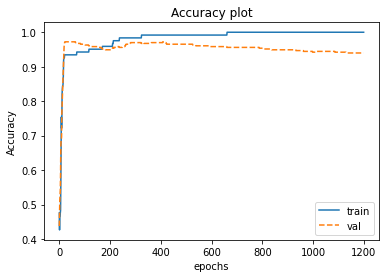

time: 198 ms (started: 2021-01-18 12:50:35 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0052370|	1.00|
Test	|0.0615646|	0.94|
time: 3.2 ms (started: 2021-01-18 12:50:35 +00:00)


Using Nesterov we get better performance, wo maybe we have to use it for the regularization

## Model 4.2.1 add Batch = 32


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS= 1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 36.8 ms (started: 2021-01-18 12:50:35 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
4/4 - 0s - loss: 0.6423 - accuracy: 0.4836 - val_loss: 0.3898 - val_accuracy: 0.5231
Epoch 2/1200
4/4 - 0s - loss: 0.4456 - accuracy: 0.4918 - val_loss: 0.4265 - val_accuracy: 0.5278
Epoch 3/1200
4/4 - 0s - loss: 0.4545 - accuracy: 0.4918 - val_loss: 0.3888 - val_accuracy: 0.5278
Epoch 4/1200
4/4 - 0s - loss: 0.3641 - accuracy: 0.4918 - val_loss: 0.2254 - val_accuracy: 0.6181
Epoch 5/1200
4/4 - 0s - loss: 0.2629 - accuracy: 0.6066 - val_loss: 0.2458 - val_accuracy: 0.6042
Epoch 6/1200
4/4 - 0s - loss: 0.2191 - accuracy: 0.6885 - val_loss: 0.1972 - val_accuracy: 0.6806
Epoch 7/1200
4/4 - 0s - loss: 0.1819 - accuracy: 0.7049 - val_loss: 0.1585 - val_accuracy: 0.8125
Epoch 8/1200
4/4 - 0s - loss: 0.1961 - accuracy: 0.8033 - val_loss: 0.1195 - val_accuracy: 0.8565
Epoch 9/1200
4/4 - 0s - loss: 0.1442 - accuracy: 0.8197 - val_loss: 0.1194 - val_accuracy: 0.8148
Epoch 10/1200
4/4 - 0s - loss: 0.1288 - accuracy: 0.8361 - val_loss: 0.1006 - val_accuracy: 0.9653
Epoch 11/1200
4/4 -

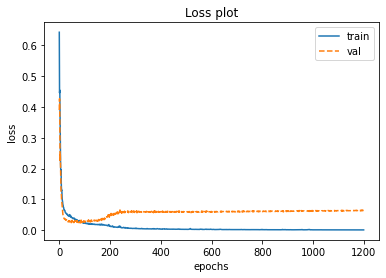

time: 336 ms (started: 2021-01-18 12:51:39 +00:00)


In [ ]:
plot_loss(history)

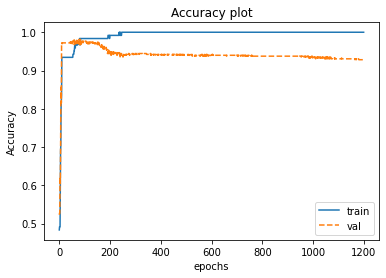

time: 181 ms (started: 2021-01-18 12:51:40 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0008872|	1.00|
Test	|0.0637124|	0.93|
time: 4.18 ms (started: 2021-01-18 12:51:40 +00:00)


With a batch_size=32 to the model 4.2 it decreases the accuracy

## Model 4.3.1 add Full Batch & Nesterov FINAL

first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS=600


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 32.4 ms (started: 2021-01-18 12:51:40 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

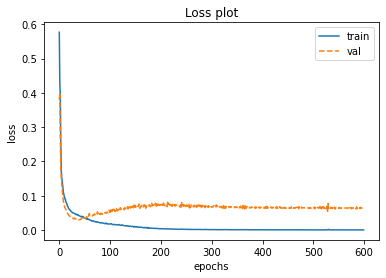

time: 190 ms (started: 2021-01-18 12:52:12 +00:00)


In [ ]:
plot_loss(history)

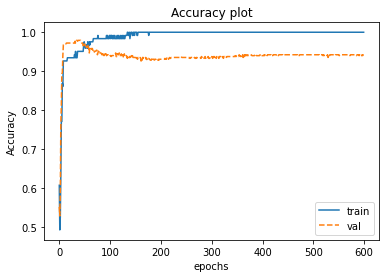

time: 192 ms (started: 2021-01-18 12:52:12 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0003989|	1.00|
Test	|0.0634516|	0.94|
time: 4.18 ms (started: 2021-01-18 12:52:13 +00:00)


With a batch_size=32 to the model 4.3 it decreases the accuracy

## Model 4.2.2 add l2 = 0.01


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.01  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 41 ms (started: 2021-01-18 12:52:13 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

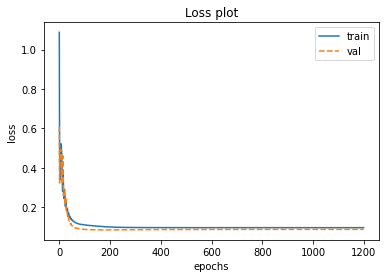

time: 186 ms (started: 2021-01-18 12:53:08 +00:00)


In [ ]:
plot_loss(history)

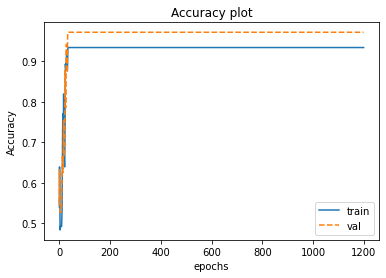

time: 197 ms (started: 2021-01-18 12:53:08 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0965815|	0.93|
Test	|0.0880924|	0.97|
time: 3.38 ms (started: 2021-01-18 12:53:08 +00:00)


Maybe we have regularized too much

## Model 4.3.1 add l2 = 0.01


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize= 0.01  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 39.6 ms (started: 2021-01-18 12:53:10 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.6750 - accuracy: 0.5246 - val_loss: 0.3086 - val_accuracy: 0.6852
Epoch 2/1200
1/1 - 0s - loss: 0.3119 - accuracy: 0.6885 - val_loss: 0.3203 - val_accuracy: 0.6412
Epoch 3/1200
1/1 - 0s - loss: 0.3362 - accuracy: 0.6230 - val_loss: 0.3166 - val_accuracy: 0.6412
Epoch 4/1200
1/1 - 0s - loss: 0.3371 - accuracy: 0.6230 - val_loss: 0.2867 - val_accuracy: 0.7037
Epoch 5/1200
1/1 - 0s - loss: 0.3083 - accuracy: 0.6803 - val_loss: 0.2422 - val_accuracy: 0.7870
Epoch 6/1200
1/1 - 0s - loss: 0.2632 - accuracy: 0.7541 - val_loss: 0.2135 - val_accuracy: 0.8426
Epoch 7/1200
1/1 - 0s - loss: 0.2325 - accuracy: 0.8033 - val_loss: 0.2123 - val_accuracy: 0.8958
Epoch 8/1200
1/1 - 0s - loss: 0.2292 - accuracy: 0.8607 - val_loss: 0.2103 - val_accuracy: 0.9352
Epoch 9/1200
1/1 - 0s - loss: 0.2271 - accuracy: 0.8934 - val_loss: 0.1974 - val_accuracy: 0.9421
Epoch 10/1200
1/1 - 0s - loss: 0.2161 - accuracy: 0.8852 - val_loss: 0.1840 - val_accuracy: 0.9375
Epoch 11/1200
1/1 -

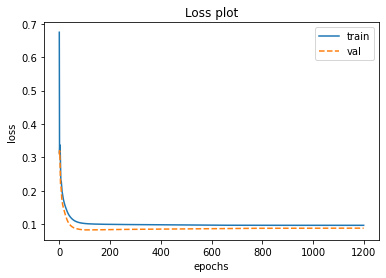

time: 206 ms (started: 2021-01-18 12:54:05 +00:00)


In [ ]:
plot_loss(history)

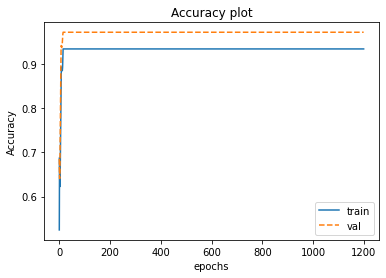

time: 182 ms (started: 2021-01-18 12:54:05 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0965835|	0.93|
Test	|0.0880383|	0.97|
time: 4.17 ms (started: 2021-01-18 12:54:05 +00:00)


Maybe we have regularized too much

## Model 4.3.1 add l2 = 0.001


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize= 0.001  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.001)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 32.8 ms (started: 2021-01-18 12:54:05 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

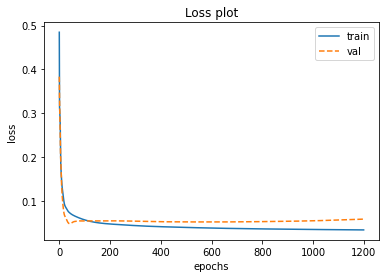

time: 189 ms (started: 2021-01-18 12:55:01 +00:00)


In [ ]:
plot_loss(history)

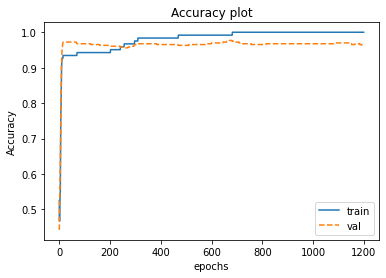

time: 193 ms (started: 2021-01-18 12:55:01 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0335656|	1.00|
Test	|0.0581866|	0.96|
time: 3.22 ms (started: 2021-01-18 12:55:02 +00:00)


We try to increase the reg term of a little bit

## Model 4.3.1 add l2 = 0.003 FINAL


first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 0.9  
    nesterov = True  
    kernel_regularize= 0.003  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS= 600

L2 = tf.keras.regularizers.L2(l2=0.003)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_regularizer=L2))
model.add(tf.keras.layers.Dense(1, activation=tanh, kernel_regularizer=L2))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 40 ms (started: 2021-01-22 12:07:34 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
1/1 - 0s - loss: 0.7405 - accuracy: 0.5082 - val_loss: 0.3609 - val_accuracy: 0.4769
Epoch 2/600
1/1 - 0s - loss: 0.3708 - accuracy: 0.5000 - val_loss: 0.2955 - val_accuracy: 0.5440
Epoch 3/600
1/1 - 0s - loss: 0.3178 - accuracy: 0.4672 - val_loss: 0.2935 - val_accuracy: 0.5787
Epoch 4/600
1/1 - 0s - loss: 0.3214 - accuracy: 0.5246 - val_loss: 0.2816 - val_accuracy: 0.5718
Epoch 5/600
1/1 - 0s - loss: 0.3117 - accuracy: 0.5246 - val_loss: 0.2517 - val_accuracy: 0.6134
Epoch 6/600
1/1 - 0s - loss: 0.2814 - accuracy: 0.5492 - val_loss: 0.2095 - val_accuracy: 0.6991
Epoch 7/600
1/1 - 0s - loss: 0.2353 - accuracy: 0.6311 - val_loss: 0.1773 - val_accuracy: 0.7894
Epoch 8/600
1/1 - 0s - loss: 0.1950 - accuracy: 0.7541 - val_loss: 0.1761 - val_accuracy: 0.8218
Epoch 9/600
1/1 - 0s - loss: 0.1838 - accuracy: 0.8279 - val_loss: 0.1850 - val_accuracy: 0.8056
Epoch 10/600
1/1 - 0s - loss: 0.1870 - accuracy: 0.8115 - val_loss: 0.1767 - val_accuracy: 0.8218
Epoch 11/600
1/1 - 0s - loss:

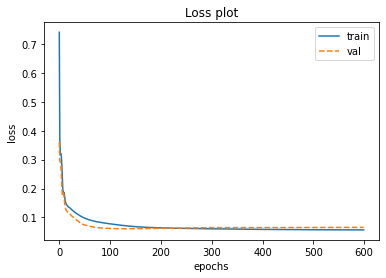

time: 199 ms (started: 2021-01-22 12:08:03 +00:00)


In [ ]:
plot_loss(history)

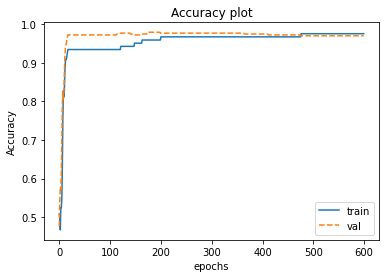

time: 193 ms (started: 2021-01-22 12:08:04 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0568311|	0.98|
Test	|0.0655740|	0.97|
time: 4.06 ms (started: 2021-01-22 12:08:04 +00:00)


The same conclusion as the model 2 so we increase the number of nodes